In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
from tqdm.notebook import tqdm
import random

In [3]:
im_dim = 50
im_size = (im_dim,im_dim)
img1 = cv2.resize(cv2.imread('monkey.png',0),im_size) #load monkey image as greyscale
img2 = cv2.resize(cv2.imread('dog.png',0),im_size) #load dog image as greyscale

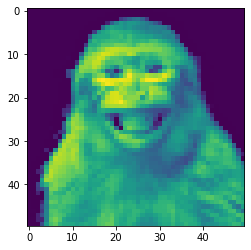

In [14]:
plt.imshow(img1); #image of monkey

<class 'numpy.dtype[uint8]'>


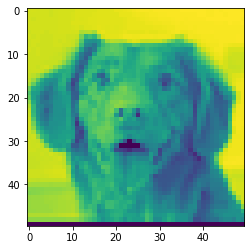

In [15]:
plt.imshow(img2); #image of dog
print(type(img2.dtype))

In [16]:
r1 = np.unpackbits(img1)
print(np.average(r1))
r2 = np.unpackbits(img2)
print(np.average(r2))
nbits = len(r1)
print(nbits)

0.36705
0.50975
20000


In [17]:
W = np.outer((r1-1/2),(r1-1/2)) + np.outer((r2-1/2),(r2-1/2))#finding weights based on image

In [18]:
print(np.shape(W))
np.fill_diagonal(W,0)
print(W)

(20000, 20000)
[[ 0.   0.5  0.  ...  0.  -0.5  0. ]
 [ 0.5  0.   0.  ...  0.  -0.5  0. ]
 [ 0.   0.   0.  ...  0.5  0.   0.5]
 ...
 [ 0.   0.   0.5 ...  0.   0.   0.5]
 [-0.5 -0.5  0.  ...  0.   0.   0. ]
 [ 0.   0.   0.5 ...  0.5  0.   0. ]]


In [19]:
#@jit(nopython=True)
def run(iterations,W,neurons,interval):
    imgs_interval = []
    neurons_interval = []
    neuron_iter = neurons
    for i in tqdm(range(iterations)):
        index = random.sample(range(0, len(neurons)), 100);
        selecW = W[index,:]
        selecW = selecW[:,index]
        neuron_iter[index] = np.dot(selecW,neuron_iter[index])>=0
        if i%interval==0:
            imgs_interval.append(np.reshape(np.packbits(neuron_iter),im_size))
            neurons_interval.append(neuron_iter)
    return imgs_interval,neurons_interval

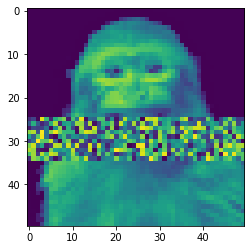

In [20]:
#create neural network with all neurons assigned 0/1 randomly with prob=0.5
#except for the first neurons which are set to the values of the image
to_use = r1
neurons = np.random.randint(2, size=nbits)
neurons[0:int(nbits*.5)] = to_use[0:int(nbits*.5)]
neurons[int(nbits*.7):nbits] = to_use[int(nbits*.7):nbits]
plt.imshow(np.reshape(np.packbits(neurons[0:nbits]),im_size))

In [21]:
imgs,neurons = run(1000,W,neurons,10)

  0%|          | 0/1000 [00:00<?, ?it/s]

[]

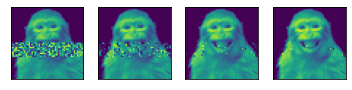

In [22]:
fig, axs = plt.subplots(1,4)
axs[0].imshow(imgs[0]);
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[1].imshow(imgs[33]);
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[2].imshow(imgs[66]);
axs[2].set_xticks([])
axs[2].set_yticks([])
axs[3].imshow(imgs[99]);
axs[3].set_xticks([])
axs[3].set_yticks([])